# World Energy Consumption

This will be a small project to look at world energy consumption and how it has changed over time. The primary focus on this dataset will be data cleaning and visualization. 


## Data Set
Data is from the [World Energy Consumption dataset](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption) on Kaggle. This data set is maintained by [Our World in Data](https://ourworldindata.org/energy). The data set contains 122 columns and 17,432 rows. Each row is a specific year for a specific country. Countries are repeated on multiple rows with varying years. 

There is a data dictionary on the Kaggle site I will not copy here for length, but the columns break down different energy types (coal, nuclear, wind, etc.) in various ways (share of consumption, annual percentage change, per capita consumption, etc. ). There is also some basic country information such as population and GDP. 

The date range begins in 1900 and ends in 2019. 



In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=4
    )


%matplotlib inline

In [2]:
energy = pd.read_csv('World_Energy_Consumption.csv')

In [255]:
energy.tail()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17431,ZWE,Zimbabwe,2019,-35.015,-9.422,NaN,NaN,NaN,NaN,NaN,...,0.956,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [254]:
energy.shape

(17432, 122)

In [4]:
energy.columns.values

array(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct',
       'gas_prod_change_twh', 'oil_prod_change_pct',
       'oil_prod_change_twh', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct',
       'biofuel_share_energy', 'biofuel_cons_change_twh',
       'biofuel_consumption', 'biofuel_cons_per_capita',
       'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct',
       'coal_share_energy', 'coal_cons_change_twh', 'coal_consumption',
       'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production',
       'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity',
       'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity',
       'renewable

In [259]:
number_of_countries = energy['iso_code'].nunique()
print(number_of_countries)

216


### Find the number of NaN values by Year

By exploring the data above, we quickly see that there are a lot of NaN values. This is because of the large time range covered in the data set. This will impact our analysis, so now let's take a look at the number of NaN values by year and column. This will start to give us an idea of what data we can use and what data we should be careful with. 

In [5]:
year_group = energy.groupby('year')


In [6]:
year_nans = energy.groupby(['year']).apply(lambda x: x.isnull().sum())

In [7]:
year_nans

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
year,,,,,,,,,,,,,,,,,,,,,
1900,7,0,0,94,94,94,94,94,94,94,...,94,94,60,94,94,94,94,94,94,94
1901,7,0,0,59,23,92,35,80,28,94,...,94,94,64,94,94,94,94,94,94,94
1902,7,0,0,59,23,92,35,79,28,94,...,94,94,63,94,94,94,94,94,94,94
1903,7,0,0,59,23,92,35,78,28,94,...,94,94,63,94,94,94,94,94,94,94
1904,7,0,0,57,23,92,35,78,28,94,...,94,94,63,94,94,94,94,94,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,25,0,0,154,90,157,149,149,149,3,...,31,158,76,13,168,158,158,158,31,158
2017,20,0,0,162,185,155,169,148,169,131,...,20,147,230,2,158,147,147,147,20,147
2018,20,0,0,162,185,155,169,148,169,131,...,20,147,230,2,158,147,147,147,20,147


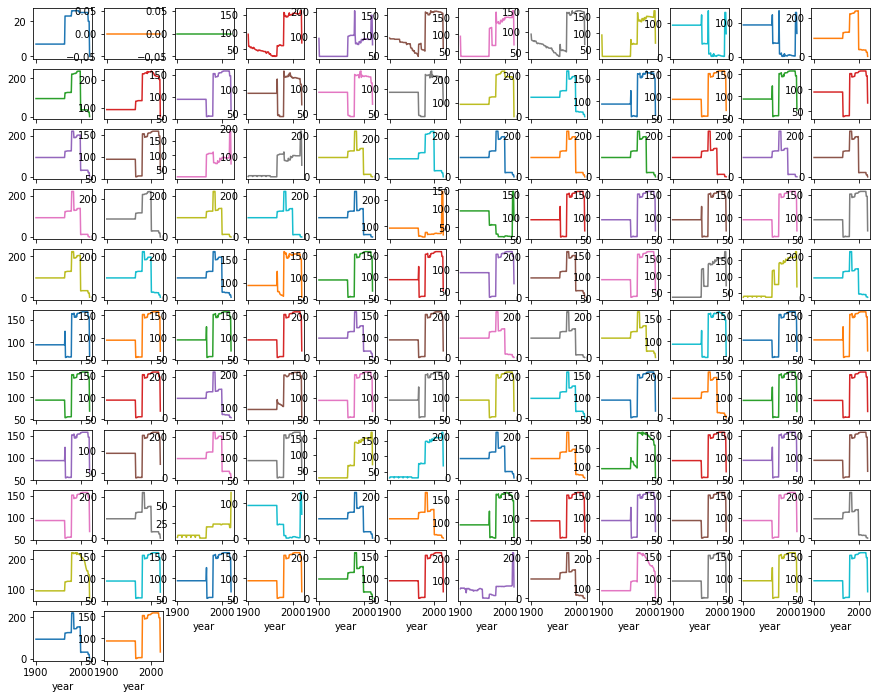

In [8]:
year_nans.plot.line(subplots=True,figsize=(15,12),sharex=True,
                   layout=(11,12),legend=False)
plt.show()

We did not add column labels to this plot because it gets too busy, but this gives us an idea of missing values. Around 100 seems to be a common number of missing values. We were hoping to see that as the data got closer to the current year, the number of missing values decreased. However, that is not the case. Quite a few columns increase suddenly to over 150 missing values (out of the about 216 available values). 

## Changes in Energy types

Now that we understand that data set a little better, let's start to get into some more details. In particular, let's start by looking at how energy usage by type has changed for different countries. We're going to be curious about how these have changed over the years, so we really want the percentage of total energy consumption for different types. 

Columns that contain the share of energy from various types end in columns with ```share_energy```. Let's use this to identify all of these columns. 

In [45]:
energy_share_cols = [col for col in energy.columns if 'share_energy' in col]

# add in iso_code, country, and year
cols_to_keep = ['iso_code','country','year']
cols_to_keep.append(energy_share_cols)

energy_share_cols.insert(0,'gdp')
energy_share_cols.insert(0,'per_capita_electricity')
energy_share_cols.insert(0,'population')
energy_share_cols.insert(0,'year')
energy_share_cols.insert(0,'country')
energy_share_cols.insert(0,'iso_code')


print(energy_share_cols)
energy_share = energy[energy_share_cols]

['iso_code', 'country', 'year', 'population', 'per_capita_electricity', 'gdp', 'biofuel_share_energy', 'coal_share_energy', 'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'low_carbon_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'other_renewables_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy']


In [262]:
print(energy_share_cols)

['iso_code', 'country', 'year', 'biofuel_share_energy', 'coal_share_energy', 'fossil_share_energy', 'gas_share_energy', 'hydro_share_energy', 'low_carbon_share_energy', 'nuclear_share_energy', 'oil_share_energy', 'other_renewables_share_energy', 'renewables_share_energy', 'solar_share_energy', 'wind_share_energy']


In [47]:
energy_share.tail()

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
17427,ZWE,Zimbabwe,2015,13815000.0,679.535,2.503057e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17428,ZWE,Zimbabwe,2016,14030000.0,486.520,2.515176e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17429,ZWE,Zimbabwe,2017,14237000.0,513.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17430,ZWE,Zimbabwe,2018,14439000.0,632.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17431,ZWE,Zimbabwe,2019,14645000.0,617.692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's pull out a single country so we can look at this data closer to understand how we might use it. For simplicity, we will start with the USA.

In [48]:
us_energy = energy_share[energy_share['iso_code'] == 'USA']

In [49]:
us_energy.head()

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
16249,USA,United States,1900,77781472.0,NaN,4.780000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16250,USA,United States,1901,79271168.0,NaN,5.310000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16251,USA,United States,1902,80720440.0,NaN,5.370000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16252,USA,United States,1903,82271904.0,NaN,5.630000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16253,USA,United States,1904,83870024.0,NaN,5.560000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


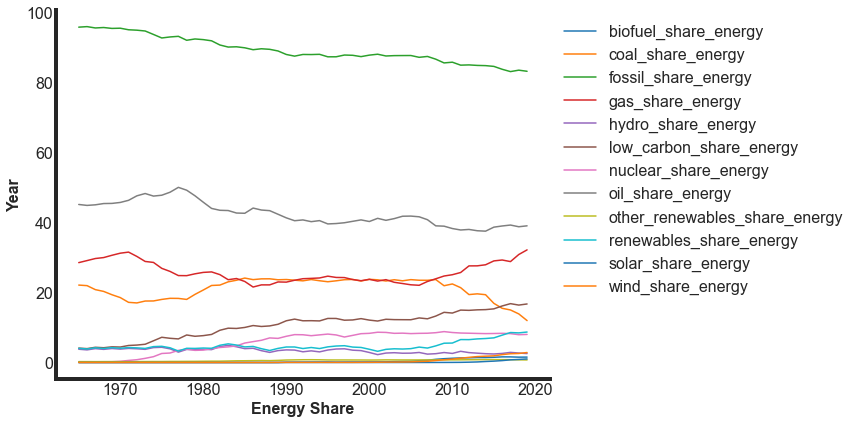

In [268]:
columns_to_plot = [col for col in us_energy.columns if 'share_energy' in col]

plt.figure(figsize=(12,6))
for x in columns_to_plot:
    sns.lineplot(data=us_energy,x='year',y=x,label=x)

    
plt.legend(fontsize=16,bbox_to_anchor=(1.0,1.0))    
plt.xlabel('Energy Share',fontsize=16)
plt.ylabel('Year',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    
plt.show()

These different columns contain some similar and overlapping information. We need to break these down to identify exactly how these columns relate to each other. It appears that some of these are sums of other columns. To do this, let's pick a few years from this data set so we can actually look at some numbers.

In [51]:
us_limited = us_energy[(us_energy['year'] >= 2010) & 
                       (us_energy['year'] <= 2015)]

In [52]:
us_limited.head(6)

,iso_code,country,year,population,per_capita_electricity,gdp,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
16359,USA,United States,2010,309011008.0,13349.233,1.530000e+13,1.212,22.460,85.862,25.099,2.597,14.138,8.576,38.303,0.758,5.562,0.030,0.965
16360,USA,United States,2011,311584000.0,13159.023,1.550000e+13,1.311,21.396,85.014,25.731,3.202,14.986,8.427,37.887,0.768,6.559,0.048,1.230
16361,USA,United States,2012,314044000.0,12889.166,1.590000e+13,1.347,19.421,85.087,27.621,2.833,14.913,8.373,38.045,0.796,6.541,0.093,1.471
16362,USA,United States,2013,316400992.0,12850.668,1.610000e+13,1.414,19.632,84.942,27.637,2.668,15.058,8.312,37.672,0.807,6.746,0.161,1.697
16363,USA,United States,2014,318672992.0,12881.037,1.650000e+13,1.419,19.386,84.880,27.942,2.518,15.120,8.262,37.552,0.828,6.859,0.288,1.807
16364,USA,United States,2015,320878016.0,12751.700,1.690000e+13,1.490,16.912,84.660,29.050,2.436,15.340,8.293,38.698,0.828,7.047,0.390,1.904


In [53]:
us_limited.columns.tolist()

['iso_code',
 'country',
 'year',
 'population',
 'per_capita_electricity',
 'gdp',
 'biofuel_share_energy',
 'coal_share_energy',
 'fossil_share_energy',
 'gas_share_energy',
 'hydro_share_energy',
 'low_carbon_share_energy',
 'nuclear_share_energy',
 'oil_share_energy',
 'other_renewables_share_energy',
 'renewables_share_energy',
 'solar_share_energy',
 'wind_share_energy']

We need to determine how these relate to each other. A few of these are combined categories. By comparing these categories, we determine that the following combinations are included here:

- Fossil: coal, gas, oil
- Renewable: biofule, hydro, solar, wind
- Nuclear

In [27]:
us_limited['total'] = us_limited.loc[:,['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']].sum(axis=1).copy()



<ipython-input-27-6a74594be6db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_limited['total'] = us_limited.loc[:,['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']].sum(axis=1).copy()


In [28]:
us_limited.head(6)

,iso_code,country,year,biofuel_share_energy,coal_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy,total
16359,USA,United States,2010,1.212,22.460,85.862,25.099,2.597,14.138,8.576,38.303,0.758,5.562,0.030,0.965,100.000
16360,USA,United States,2011,1.311,21.396,85.014,25.731,3.202,14.986,8.427,37.887,0.768,6.559,0.048,1.230,100.000
16361,USA,United States,2012,1.347,19.421,85.087,27.621,2.833,14.913,8.373,38.045,0.796,6.541,0.093,1.471,100.001
16362,USA,United States,2013,1.414,19.632,84.942,27.637,2.668,15.058,8.312,37.672,0.807,6.746,0.161,1.697,100.000
16363,USA,United States,2014,1.419,19.386,84.880,27.942,2.518,15.120,8.262,37.552,0.828,6.859,0.288,1.807,100.001
16364,USA,United States,2015,1.490,16.912,84.660,29.050,2.436,15.340,8.293,38.698,0.828,7.047,0.390,1.904,100.000


We have confirmed how thes columns relate to each other. We are missing the ```low_carbon``` and ```other_renewables``` columns from our sum.

```low_carbon``` is renewable energy (biofuel, hydro, solar, wind) and nuclear summed.


```other_renewables``` is still a little unclear on the meaning. But we do not want to proceed without understanding this column. Some investigation leads us to understand that ```other_renewables``` is included in the sum of renweables = biofuel + hydro + solar + wind + other_renewables

## Visualizing changes in energy sources

Now that we have sorted out the energy shares for each country, let's begin to take a look at how these values have changed over time. We will create a visualization that shows us how ```fossil```, ```nuclear```, and ```renewables``` have changed as percentages over the period we have data for.

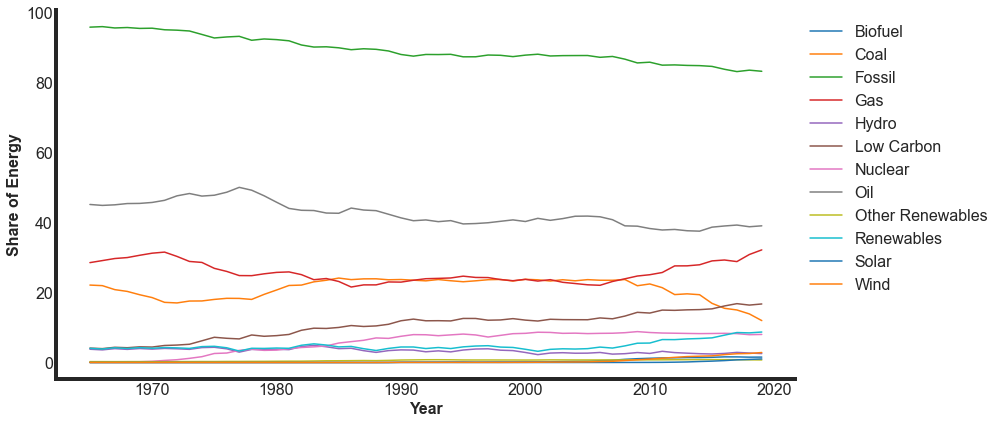

In [253]:

plt.figure(figsize=(14,6))

sns.lineplot(data=us_energy,x='year',y='biofuel_share_energy',label='Biofuel')
sns.lineplot(data=us_energy,x='year',y='coal_share_energy',label='Coal')
sns.lineplot(data=us_energy,x='year',y='fossil_share_energy',label='Fossil')
sns.lineplot(data=us_energy,x='year',y='gas_share_energy',label='Gas')
sns.lineplot(data=us_energy,x='year',y='hydro_share_energy',label='Hydro')
sns.lineplot(data=us_energy,x='year',y='low_carbon_share_energy',label='Low Carbon')
sns.lineplot(data=us_energy,x='year',y='nuclear_share_energy',label='Nuclear')
sns.lineplot(data=us_energy,x='year',y='oil_share_energy',label='Oil')
sns.lineplot(data=us_energy,x='year',y='other_renewables_share_energy',label='Other Renewables')
sns.lineplot(data=us_energy,x='year',y='renewables_share_energy',label='Renewables')
sns.lineplot(data=us_energy,x='year',y='solar_share_energy',label='Solar')
sns.lineplot(data=us_energy,x='year',y='wind_share_energy',label='Wind')


plt.legend(fontsize=16,bbox_to_anchor=(1.0,1.0))

plt.xlabel('Year', fontsize=16)
plt.ylabel('Share of Energy', fontsize=16)

#plt.xlim(-40,100)
#plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.axhline(y=0,color='k')

plt.show()




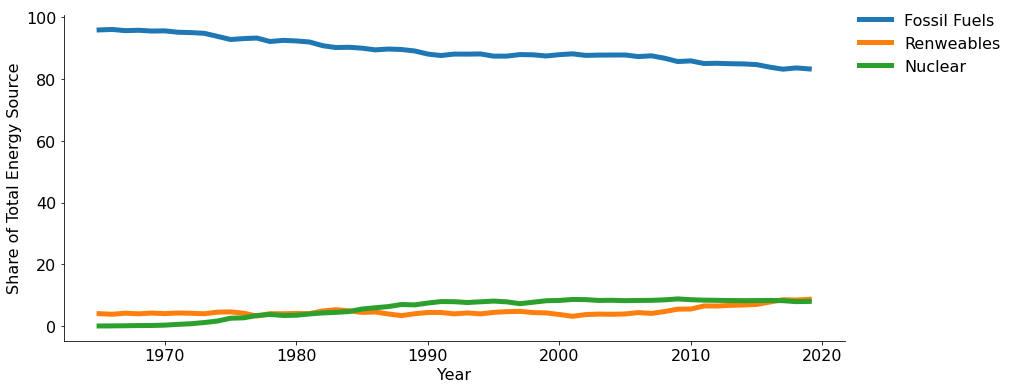

In [44]:
cols = ['fossil_share_energy', 'renewables_share_energy', 'nuclear_share_energy']

plt.figure(figsize=(14,6))
plt.plot(us_energy['year'],us_energy['fossil_share_energy'], linewidth=5.0, label='Fossil Fuels')
plt.plot(us_energy['year'],us_energy['renewables_share_energy'], linewidth=5.0, label = 'Renweables')
plt.plot(us_energy['year'],us_energy['nuclear_share_energy'], linewidth=5.0, label = 'Nuclear')


plt.xlabel('Year', fontsize=16)
plt.ylabel('Share of Total Energy Source', fontsize=16)
#plt.title('Daily Temperature in Ann Arbour, Michigan', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, frameon=False, bbox_to_anchor=(1.0, 1.05))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

This is not particualarly intersting at this point. The differences in these values are too large, and the changes too small, to quickly understand the story. 

We need a better story to tell. Let's consider some of the other infomration in our dataframe. Let's look at including ```gdp```, ```per_capita_electricity```, or ```population```. 

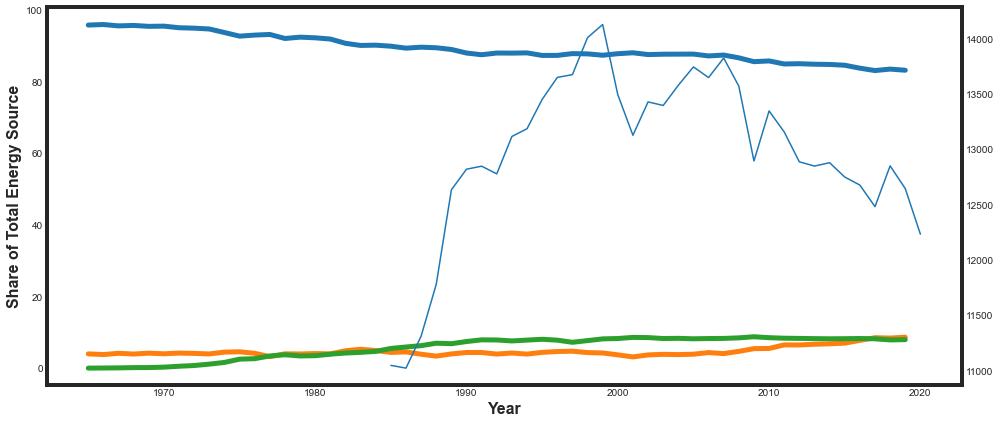

In [271]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(us_energy['year'],us_energy['fossil_share_energy'], linewidth=5.0, label='Fossil Fuels')
ax.plot(us_energy['year'],us_energy['renewables_share_energy'], linewidth=5.0, label = 'Renweables')
ax.plot(us_energy['year'],us_energy['nuclear_share_energy'], linewidth=5.0, label = 'Nuclear')

ax.set_xlabel('Year',fontsize=16)
ax.set_ylabel('Share of Total Energy Source', fontsize=16)


ax2 = ax.twinx()
ax2.plot(us_energy['year'],us_energy['per_capita_electricity'])


plt.show()

Similar to above, adding information to this plot does not tell an attractive story. It's unclear what the take away is going to be. Instead of looking at percent shares, let's try looking at percent changes over time.

## Percent Changes Over Time

To look at percent changes over time, we'll write a function called ```calculate_changes``` that calculates the changes we are interested in. This allows us to quickly iterate and calculate the information we are interested in.



In [98]:
country_list = energy['iso_code'].unique().tolist()

country_list.pop(1) # NAN is one of the values that we need to remove
country_list.remove('OWID_WRL')
country_list.remove('OWID_KOS')




#country_list

Let's calculate the change in a countries population, GDP, and ratio of energy sources between 1990 and 2015. We'll create a new dataframe with this information. 


In [200]:
def calculate_changes(df,country_code,first_year,last_year):
    '''
    Function to calculate the percent changes in the GDP, population, and share of renewable energy.
    
    INPUT:
        df: dataframe 
        country_code: 3 letter ISO code for country of interest
        first_year: first year you want to include in the calculation
        last_year: last year (inclusive) you want to include in the calculation
        
    OUTPUT:
        gdp_change: percent change in GDP from first_year to last_year
        pop_change: percent change in population from first_year to last_year
        energy_change: percent change in the share of (nuclear + renewable) energy. A positive
                        value indicates the country is using more (nuclear + renewable) energy in
                        the last year compared to the first
    '''
    
    # create a temporary dataframe with only the country of interest
    country_df = df[df['iso_code'] == country_code]

    # we want to calculate the percent changes between the first year and the last year
    early_year = country_df[country_df['year'] == first_year]
    last_year = country_df[country_df['year'] == last_year]

    # we need to check if we have data for that year for that country
    # if not, we will return 0, 0, 0
    if early_year.shape[0] == 0:
        return(0,0,0)
    if last_year.shape[0] == 0:
        return(0,0,0)
        
    # now we are ready to calculate the percent changes
    gdp_change = (last_year.iloc[0]['gdp'] - early_year.iloc[0]['gdp']) / last_year.iloc[0]['gdp'] * 100
    pop_change = (last_year.iloc[0]['population'] - early_year.iloc[0]['population']) / last_year.iloc[0]['population'] * 100

    # the change in energy ratio is a little more complicated.
    # first we need to determine the ratio in both years of interest
    energy_ratio_early =  early_year.iloc[0]['nuclear_share_energy'] + early_year.iloc[0]['renewables_share_energy']
    energy_ratio_last = last_year.iloc[0]['nuclear_share_energy'] + last_year.iloc[0]['renewables_share_energy']
    energy_change = (energy_ratio_last - energy_ratio_early) / energy_ratio_last * 100

    if np.isnan(gdp_change):
        gdp_change = 0
    if np.isnan(pop_change):
        pop_change = 0
    if np.isnan(energy_change):
        energy_change = 0
    
    return(gdp_change, pop_change, energy_change)
    
    

In [129]:
calculate_changes(energy,'ERI', 1992, 2015)

(0, 0, 0)

Running our function on a few different countries randomly selected, we see that quite a few have missing values. This will impact how much data we have at the end, because if one of the years of interest is missing, we can't calculate the change we want. We need to optimize the years that we choose. Let's take a look at some variety of options to make this decision.

In [168]:
# let's keep track of how many we remove so we can decide on which numbers are best.



first_years = [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
               1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
               2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
               2010]
last_year = 2015

start_year_missing = {}

for y in first_years:
    year_test_df = pd.DataFrame(columns = ['country','pop_change','gdp_change','energy_change'])

    for country in country_list:
        gdp_change, pop_change, energy_change = calculate_changes(energy,country,y,last_year)
        new_row = {'country': country,
                  'pop_change': pop_change,
                  'gdp_change': gdp_change,
                  'energy_change': energy_change}
        year_test_df = year_test_df.append(new_row, ignore_index=True)

    missing = year_test_df[(year_test_df['pop_change'] == 0) |
                           (year_test_df['gdp_change'] == 0) |
                           (year_test_df['energy_change'] == 0)].count()
    #print(missing['country'])
    start_year_missing[y] = missing['country']

In [169]:
start_year_missing

{1980: 150,
 1981: 150,
 1982: 150,
 1983: 150,
 1984: 150,
 1985: 140,
 1986: 139,
 1987: 139,
 1988: 139,
 1989: 139,
 1990: 136,
 1991: 136,
 1992: 136,
 1993: 135,
 1994: 135,
 1995: 135,
 1996: 135,
 1997: 135,
 1998: 135,
 1999: 135,
 2000: 135,
 2001: 136,
 2002: 135,
 2003: 135,
 2004: 135,
 2005: 136,
 2006: 136,
 2007: 135,
 2008: 137,
 2009: 135,
 2010: 135}

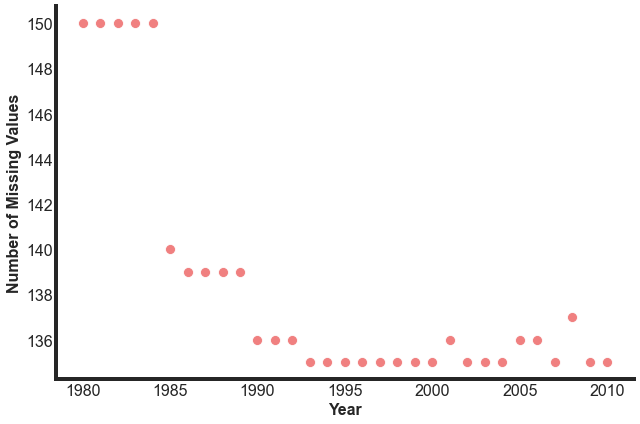

In [246]:
year_missing = pd.Series(start_year_missing)

plt.figure(figsize=(9,6))
sns.scatterplot(data=year_missing,
               s = 100,
               color = 'lightcoral')


plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Missing Values', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()



Starting with 1980, we are missing 150 values. This decreases to 140 in 1985, then over the next 25 years, it goes down to 136 missing values, then oscillates some. We want the biggest lever here to see the change over the longest period of time, so we will start with 1985 as our start date. This gives us 10 additional countries that were not included before then, but still gives us 30 years of data to work with.

In [181]:
change_df = pd.DataFrame(columns = ['country','pop_change','gdp_change','energy_change'])

first_year = 1985
last_year = 2015

for country in country_list:
    gdp_change, pop_change, energy_change = calculate_changes(energy,country,first_year,last_year)
    new_row = {'country': country,
              'pop_change': pop_change,
              'gdp_change': gdp_change,
              'energy_change': energy_change}
    change_df = change_df.append(new_row, ignore_index=True)
    

# remove rows that have 0s
cleaned_change_df = change_df[(change_df['pop_change'] != 0) &
                           (change_df['gdp_change'] != 0) &
                           (change_df['energy_change'] != 0)]


In [183]:

cleaned_change_df.shape

(74, 4)

In [182]:
cleaned_change_df.head()

,country,pop_change,gdp_change,energy_change
2,DZA,43.536045,45.029240,-651.648352
6,ARG,29.852583,55.000000,-8.332766
9,AUS,34.547886,63.809524,31.088561
10,AUT,12.259477,63.496144,15.969432
11,AZE,30.728463,52.752510,39.517697


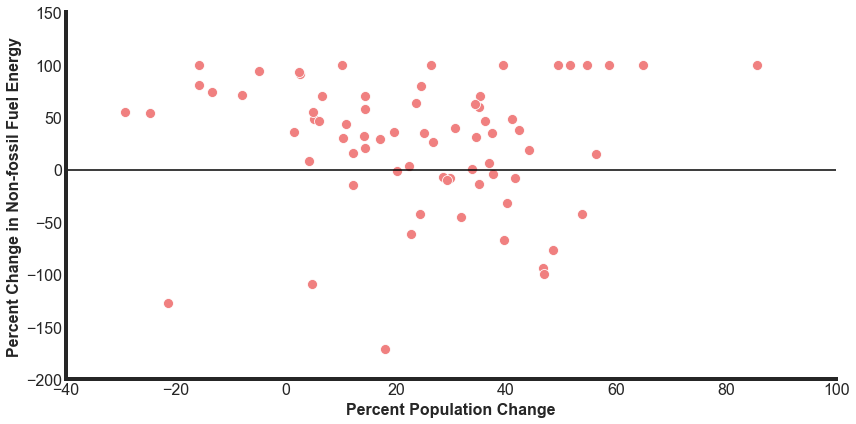

In [241]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=cleaned_change_df,
               x = 'pop_change',
               y = 'energy_change',
               color = 'lightcoral',
               s=100)

plt.xlabel('Percent Population Change', fontsize=16)
plt.ylabel('Percent Change in Non-fossil Fuel Energy', fontsize=16)

plt.xlim(-40,100)
plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=0,color='k')

plt.show()

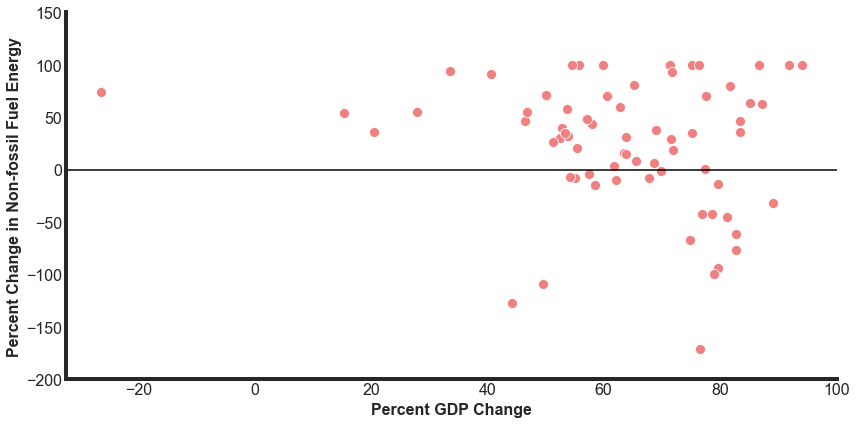

In [243]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=cleaned_change_df,
               x = 'gdp_change',
               y = 'energy_change',
               color = 'lightcoral',
               s=100)

plt.xlabel('Percent GDP Change', fontsize=16)
plt.ylabel('Percent Change in Non-fossil Fuel Energy', fontsize=16)

#plt.xlim(-40,100)
plt.ylim(-200,150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(y=0,color='k')

plt.show()

In [244]:
cleaned_change_df.sort_values(by='gdp_change')
#cleaned_change_df['energy_change'].value_counts()

,country,pop_change,gdp_change,energy_change
200,UKR,-13.349806,-26.491647,73.630489
28,BGR,-24.652778,15.322581,53.722707
158,RUS,1.398765,20.420420,35.916568
105,LVA,-29.179179,27.915930,54.572374
16,BLR,-4.894586,33.513514,94.117647
...,...,...,...,...
145,OMN,64.893368,86.716553,100.0
209,VNM,34.291140,87.270503,62.449477
89,IND,40.132134,89.094767,-32.325519
172,SGP,51.609442,91.813517,100.0


In [229]:
def check_values(df,country_code,first_year,last_year):
    '''
    Function to check the percent changes
    '''
    country_df = df[df['iso_code'] == country_code]

    # we want to calculate the percent changes between the first year and the last year
    early_year = country_df[country_df['year'] == first_year]
    last_year = country_df[country_df['year'] == last_year]
    
    new_df = pd.concat([early_year[['country','iso_code','year','population','gdp',
                                  'nuclear_share_energy','renewables_share_energy']],
                       last_year[['country','iso_code','year','population','gdp',
                                  'nuclear_share_energy','renewables_share_energy']]],
                      axis=0)
    return new_df
    
    

    

In [245]:
check_df = check_values(energy,'UKR',1985,2015)
check_df.head()

,country,iso_code,year,population,gdp,nuclear_share_energy,renewables_share_energy
16037,Ukraine,UKR,1985,50919000.0,5.300000e+11,5.335,1.072
16067,Ukraine,UKR,2015,44922000.0,4.190000e+11,22.475,1.822


There are a number of significant outliers. Let's take a look at the most extreme changes to having less non-fossil energy sources between 1985 and 2015. 

- Trinidad and Tobago (TTO) has a -1233% decline in their share of non-fossil energies. TTO had a very small share of renewable energy (less than 0.1%), so this accentuates any changes.
- Algeria (DZA) went from a 0.6% share of renewable energy in 1985 to a 0.09% share in 2015. 
- Bangladesh (BGD) went from a 4% share of renewable energy in 1985 to a 0.7% share in 2015.

There are also 9 countries that have a 100% change in non-fossil fuel usage. This indicates that these countries started with 0 non-fossil use but now have some usage, even if small.


Ukraine is an interesting country that had a GDP that has gotten smaller but has significantly increased it's share of nuclear energy, leading to a 73% increase in non-fossil energies.


## Next Steps

At this point, we are going to wrap up this project. If we continued to work on it, here are some ideas of directions we could take:

- We decided to limit the comparisons here to data that was included in the data set. Considering outside information would potentially provide more information to help us understand some of these changes that we have found. Some of the helpful information could be money spent on environmental innitiatives, primary modes of transportation, trade.
- Our final plots only included 74 of the 216 countries available in the dataset. We could take a closer look at some of these missing countries to see if we could calculate our desired fields based on information that has been included. 
- We could use the time series data included to make predictions for the future and how, globally or by country, energy consumption will look at specific years of interest related to climate change. 
